In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [2]:
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")


In [3]:
df_shops = pd.read_pickle("./df_shops.pkl")


In [4]:
df_checks_with_cat.head()

,CheckUID,id_tt_cl,id_tov_cl,Quantity,week,BaseSum,hour,name_gr,name_gr2
0,32C04617-1DA6-EC11-9064-005056A7A8DF,16061,25528,1.0,11,422.73,20,Овощи. Фрукты. Грибы. Зелень,Авокадо
1,7CC04B95-79AA-EC11-9064-005056A7A8DF,11846,1609,2.0,12,67.62,10,Молочная Продукция,Лакомства молочные
2,7BC04CF0-8AA6-EC11-9064-005056A7A8DF,11160,49220,1.0,11,124.17,10,Пространство ВкусВилл,Продажа услуг
3,75C04F15-4C9A-EC11-9064-005056A7A8DF,14258,55220,1.0,9,69.09,19,Молочная Продукция,Йогурты питьевые
4,54C0631E-D2AD-EC11-9064-005056A7A8DF,12853,32931,1.0,12,49.09,16,Хлеб,Хлеб на закваске


Строим пивот таблицу по группам

In [5]:
df_category_pivot_sum = df_checks_with_cat.pivot_table(columns=['name_gr2'],index=['id_tt_cl'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()


Исправляем кривое форматирование пивот таблицы

In [6]:

df_category_pivot_sum = pd.concat([df_category_pivot_sum['id_tt_cl'].to_frame(),df_category_pivot_sum.loc[:,'BaseSum']], axis=1)

Добавляем по каждому магазину сумму проданных итемов -- df_category_pivot_sum

In [7]:
df_category_pivot_sum['overal_sum'] = df_category_pivot_sum.drop('id_tt_cl',axis=1).sum(axis=1)

Добавляем по каждому магазину количество проданных итемов в процентах по каждой категории -- df_category_pivot_sum3

In [8]:
df_category_pivot_sum3 = df_category_pivot_sum.copy()

In [9]:
for column in df_category_pivot_sum3.drop(['id_tt_cl','overal_sum'],axis=1):
    df_category_pivot_sum3[column] = df_category_pivot_sum3[column].div(df_category_pivot_sum3['overal_sum']/100)

In [10]:
del df_category_pivot_sum3['overal_sum']

In [11]:
df_category_pivot_sum3.head()

,id_tt_cl,Авокадо,Аксессуары,Архив,Архив Кафе,"Б/а пиво, вино",Бакалея (МБ),Бакалея ММ,Бакалея даркстор,Бакалея для спортивного питания,Баранина. Оленина. Прочее мясо,"Баранки, сушки, сухари",Батончики,"Батончики, снэки кафе",Бахчевые,Безлактозные продукты,Блинчики,Бытовая химия (МБ),Бытовые товары,ВВ Бокс,ВВП Сладкий ассортимент,Вареники,"Вареные овощи, овощные снеки",Варенье,"Варенье. Мед, ВП",Вафли,Веганская продукция (МБ),Винограды,"Витамины, бады (МБ)",Витамины. БАД,Влажные салфетки,Вода,Вода (МБ),"Восточные сладости, халва",Все для дома (МБ),Вторые блюда,Вторые блюда мясо айс,Вторые блюда птица ДК,Вторые блюда птица айс,Вторые блюда рыба айс,"Выпечка, печенье кафе","Выпечка, пироги",ГРИЛЬ овощи,Газированные напитки. Квас (МБ),Говядина.Телятина.,Горячие блюда айс,Горячие закуски айс,Горячие напитки,Готовая кулинария Еком,Готовые молочные блюда,Готовые решения из рыбы,Грибы,Гриль-колбаски,Груши,Деликатесы,Десерты Дарксторы,Десерты айс,Десерты веганские,Десерты выходного дня,Десерты детские,Десерты для праздников,Десерты кафе,Десерты молочные,Десерты на компанию айс,Десерты низкокалорийные,Детская бакалея,Детская бытовая химия,Детская гигиена,Детская косметика,Детская кулинария,Детская полка,Детские мясные продукты,Детские напитки,Детские товары НонФуд (МБ),Детские товары Фуд (МБ),Детское ложковое молочное питание,Детское питьевое молочное питание,Детское развитие и обучение,Диет Стол,Другое мясо ГП,Завтраки,Завтраки айс,Закуски,Заливное.Холодец,Замороженная рыба,Замороженное мясо и субпродукты,Замороженное тесто,Замороженные готовые блюда,Замороженные морепродукты,"Замороженные овощи,грибы,ягоды",Замороженные торты,Зелень,"Зефир, безе, пастила","Зефир, пастила, мармелад (РП)",Икра,Индейка,Индейка ГП,Йогурты ложковые,Йогурты питьевые,Как дома КК,Канцтовары (МБ),Карты,Кафе регионы,Кафе-кулинария Проект,Квас. Лимонады. Компоты,"Кексы, рулеты",Кефир,Кисломолочные продукты,Колбаса в/к и п/к,Колбаса вареная. Ветчина,Колбаса с/к и с/в,"Колготки, гольфы, носки",Комбо-наборы,Консервация (МБ),Консервация даркстор,Консервированные морепродукты и рыба,Консервы (РП),Конструктор айс,Конструктор гарнир айс,Конфеты,Конфеты весовые,Корм для кошек,Корм для собак,Корнеплоды,"Косметика, средства гигиены (онлайн)",Косточковые,Кофе и чай для кафе,Кофе.Какао,Красота и здоровье (МБ),Кремы и сыворотки для лица,Кролик,Крупы. Бобовые,Кулинария Дарки,Кулинария Кафе,Куличи,Кумыс,Курица,Курица ГП,Лакомства молочные,Леденцы,Личная гигиена,Макаронные изделия,Макаронные изделия (РП),Манго (все виды),Мармелад,Маски для лица,"Маски, антисептики, перчатки",Масло,"Маффины, кексы",Мед,Медицинские изделия,Мелкоштучные х/б изделия,Молоко,Молочные напитки,Молочные продукты (МБ),Мороженое,Мороженое ТОПЫ,Мороженое Фрешбар,Морсы,Мука,Мусорные пакеты,Мыло косметическое,Мясная консервация,Мясные деликатесы. Халяль,Мясные снеки,Мясо. Птица. П/ф охл. (МБ),Мясо. Птица. П/ф охл. Яйца. Халяль,Наборы,Наборы пирожных,Напитки (РП),Напитки ММ,Напитки Фрешбар,Напитки айс,Напитки проектов,Национальный хлеб,НеМясо,Овощи,Овощные закуски,Овощные и бобовые консервы,Огурцы,Одноразовая посуда,Окрошки,"Оливки, маслины",Орехи и семечки,Орехи и сухофрукты Даркстор,"Орехи, семечки (МБ)",Освежители воздуха,Охлажденные готовые блюда,Охлаждённые полуготовые блюда,"Очищение, тонизирование лица",П/ф айс,П/ф выпечка айс,П/ф из мяса,П/ф из птицы,П/ф мясные замороженные,П/ф постные,П/ф рыбные,"Паштеты, риеты рыбные",Паштеты.Риеты,Пельмени.Манты,Перцы,"Печенье, галеты, крекеры",Пиво,Пиво. Сидр (ГП),Пироги айс,"Пироги, Рулеты",Пирожки айс,Пирожные,Пирожные муссовые,"Пирожные творожные, чизкейки",Пиццы,Пиццы айс,Подписки,Поир,Полотенца и салфетки,Попкорн,Посуда и аксессуары для хранения и приготовления,Пресервы из рыбы и морепродуктов,Продажа услуг,Продукты из козьего молока,"Профитроли, эклеры",Прочие напитки,Прямые поставки (хлеб из осн.ассортимента),Пряники,Пюре мясное/рыбное детское питание,Пюре овощное детское питание,Пюре фруктовое детское питание,"Растительные ложковые продукты, сырки",Растит

In [12]:
df_shops.head()

,adress,Hours,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,qty_kassa_so,format,Region,Start_date,size,quality
id_tt,,,,,,,,,,,,,,
10780,"Москва Осенний бульвар, д. 12, корп. 6",с 7-00 до 23-30,55.758341,37.413949,111.0,Крылатское,9.0,9.0,3.0,ВкусВилл,ZAO,2014-11-27,S,1
10786,"Москва проспект Вернадского, д. 39",с 8-00 до 22-00,55.675544,37.505894,210.0,Проспект Вернадского,5.0,8.0,1.0,ВкусВилл,ZAO,2014-12-26,L,30
10864,"Москва проспект Мира, д. 116",будни с 8-00 до 22-00; вых. с 9-00 до 22-00,55.808868,37.638011,113.4,Алексеевский,4.0,6.0,2.0,ВкусВилл,SVAO,2015-03-24,S,-1
10904,"Москва ул. 26 Бакинских Комиссаров, д. 8, корп. 2",с 9-00 до 22-00,55.659170,37.491359,114.5,Тропарево-Никулино,3.0,5.0,1.0,ВкусВилл,ZAO,2015-05-15,S,-1
11103,"Москва Можайское шоссе, д. 28",с 8-00 до 22-00,55.720249,37.421364,155.4,Можайский,5.0,6.0,1.0,ВкусВилл,ZAO,2015-12-01,M,20


Выбираем хорошие и плохие магазины 

In [19]:
df_average_L =  df_shops[df_shops['quality'] == 30].index.tolist()
df_bad_L =  df_shops[df_shops['quality'] == -3].index.tolist()
df_good_L = df_shops[df_shops['quality'] == 3].index.tolist()
df_average_M =  df_shops[df_shops['quality'] == 20].index.tolist()
df_bad_M =  df_shops[df_shops['quality'] == -2].index.tolist()
df_good_M = df_shops[df_shops['quality'] == 2].index.tolist()
df_average_S =  df_shops[df_shops['quality'] == 10].index.tolist()
df_bad_S =  df_shops[df_shops['quality'] == -1].index.tolist()
df_good_S = df_shops[df_shops['quality'] == 1].index.tolist()

In [20]:
df_category_good_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_L)].mean(axis=0).to_frame(name="good")
df_category_bad_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_L)].mean(axis=0).to_frame(name="average")
df_category_average_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_L)].mean(axis=0).to_frame(name="bad")
df_category_good_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_M)].mean(axis=0).to_frame(name="good")
df_category_bad_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_M)].mean(axis=0).to_frame(name="average")
df_category_average_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_M)].mean(axis=0).to_frame(name="bad")
df_category_good_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_S)].mean(axis=0).to_frame(name="good")
df_category_bad_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_S)].mean(axis=0).to_frame(name="average")
df_category_average_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_S)].mean(axis=0).to_frame(name="bad")


Строим итогову табличку по процентам продаж категорий в зависимости размера магазина

In [21]:


df_category_diff_L =  pd.concat([df_category_good_L,df_category_average_L, df_category_bad_L], ignore_index=False, axis=1).drop(index='id_tt_cl')
df_category_diff_M =  pd.concat([df_category_good_M,df_category_average_M, df_category_bad_M], ignore_index=False, axis=1).drop(index='id_tt_cl')
df_category_diff_S =  pd.concat([df_category_good_S,df_category_average_S, df_category_bad_S], ignore_index=False, axis=1).drop(index='id_tt_cl')

<AxesSubplot:>

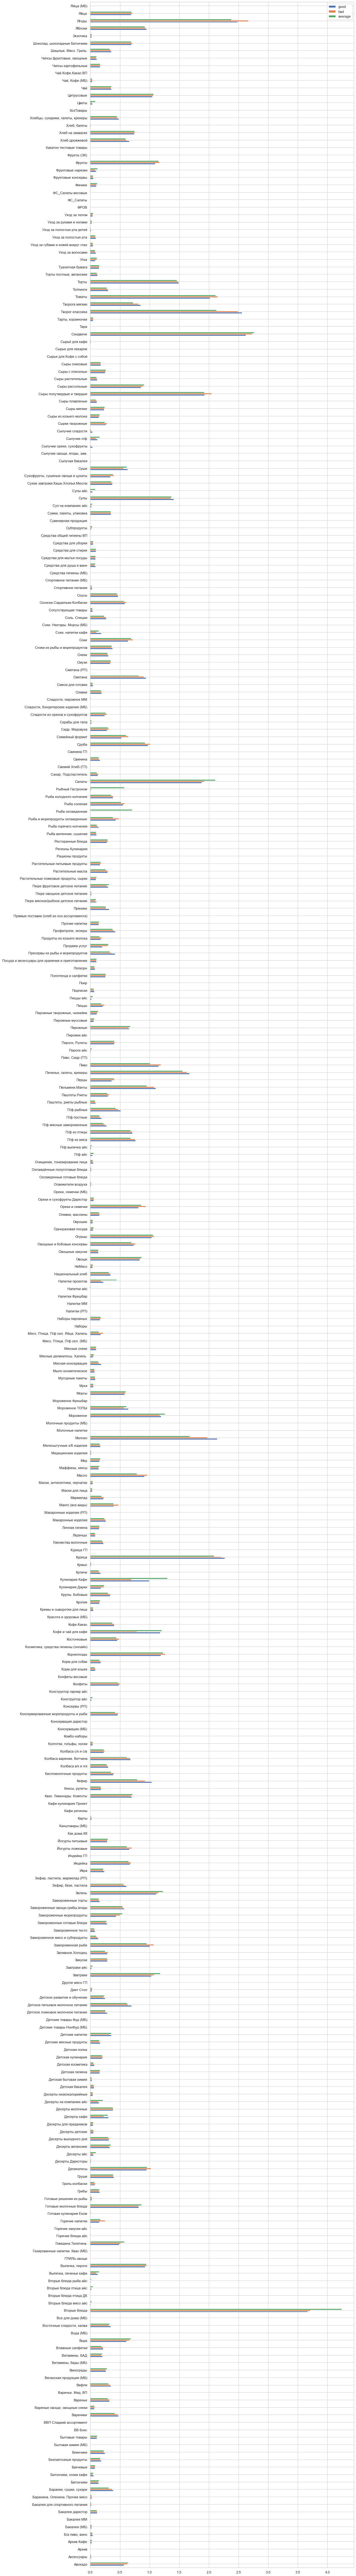

In [23]:
df_category_diff_L.plot(kind="barh",figsize=(15,150))

In [39]:
df_category_diff_L.to_excel("./df_category_diff_L.xlsx")
df_category_diff_M.to_excel("./df_category_diff_M.xlsx")
df_category_diff_S.to_excel("./df_category_diff_S.xlsx")